**Angel Bastardo**

**Fecha 12 de marzo de 2024**

**Practica 2 regresion lineal**

1. Genera un dataset sintético que va a contener 800 instancias que representen personas. Cada
persona va a tener los siguientes atributos:
- Valores de presión arterial y colesterol. Ten en cuenta que el nivel normal de colesterol se
considera por debajo de 180, aunque puede variar entre 120 y 250, y el nivel normal de
presión arterial sistólica se encuentra entre 100 y 120, aunque puede variar entre 70 y 180.
- Valores aleatorios de otro atributo que simule otros datos de la persona (pueden ser
inventado).

Re: para ello se ha creado la funcion "generar datos" que crea tres array "presion arterial" "valores colesterol" y edad:

2. Para cada instancia, calcula la probabilidad de tener problemas vasculares. Ten en cuenta las
consideraciones sobre los valores de presión arterial y colesterol.

Re: Para ello se ha creado la funcion "calculo de probabilidades" que tiene como entrada los arrays anteriores, y calcula la probabilidad de que se tenga un problema en cada muestra como el producto de (probabildad_de_problema_arterial) * (probabilidad_de_problema_colesterol)* (probabilidad_de_problema_edad). Cada probabilidad independiente se ha calculado de la manera sugerida en clase (valor-min)/(max-min)

In [203]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression



def generar_datos(cantidad_instancias):
    ## Valores
    presion_arterial= np.random.uniform(100,120,cantidad_instancias)
    valores_colesterol= np.random.uniform(120,250,cantidad_instancias) # 800 instancias empieza en segundo 0 y termina en segundo 59
    edad= np.random.uniform(40,50,cantidad_instancias) # valores de 40 a 50 años de edad
    return presion_arterial,valores_colesterol,edad



def calculo_probabilidades(X,Y,Z):

    # calculos artesanales
    min_presion_arterial=min(X)
    max_presion_arterial=max(X)

    min_valores_colesterol= min(Y)
    max_valores_colesterol= max(Y)

    min_edad= min(edad)
    max_edad=max(edad)

    propabilidad_de_problema_arterial= (X - min_presion_arterial)/(max_presion_arterial-min_presion_arterial)
    probabilidad_de_problema_colesterol = (Y-min_valores_colesterol)/(max_valores_colesterol-min_valores_colesterol)
    probabilidad_de_problema_edad= (Z-min_edad)/(max_edad-min_edad)

    probabilidad_de_tener_problemas_cardiovasculares= propabilidad_de_problema_arterial* probabilidad_de_problema_colesterol*probabilidad_de_problema_edad

    return probabilidad_de_tener_problemas_cardiovasculares



if __name__=='__main__':
    catidad_instancias=800
    #1) Generar datasets sintetico 800
    presion_arterial,valores_colesterol,edad=generar_datos(catidad_instancias) # 800 instancias

    #2) Para cada instancia de calcula la probabilidad de tener problemas vasculares
    probabilidades_instancia_de_tener_problemas=calculo_probabilidades(presion_arterial,valores_colesterol,edad)
    print(f'Las probabilidades de tener problemas vasculares es \n {probabilidades_instancia_de_tener_problemas}')

    

Las probabilidades de tener problemas vasculares es 
 [3.06635713e-01 1.88067709e-02 2.75050716e-01 2.23647938e-02
 1.59706980e-01 5.13648956e-01 1.21024510e-03 8.11803658e-03
 2.32111931e-01 7.30514187e-03 9.28608063e-02 1.11003999e-02
 2.84235217e-02 6.37560649e-02 5.45271889e-02 3.63989267e-02
 9.45353107e-04 2.93900353e-02 1.92932260e-01 6.04652964e-01
 5.05242815e-03 1.20165839e-01 4.23004918e-03 9.30707932e-02
 1.12198379e-01 1.71722122e-02 1.38340287e-01 7.63937217e-02
 1.49187189e-01 4.34052538e-02 5.90896360e-02 4.22486421e-01
 1.80287625e-03 1.22085387e-02 1.51219235e-02 1.13282683e-03
 7.12414211e-02 1.08923126e-02 1.76398251e-02 3.72030829e-01
 7.51944409e-02 1.59485693e-04 4.51003884e-03 1.52892967e-01
 3.74679093e-02 1.42268940e-01 1.31275059e-01 2.05354528e-02
 5.50371687e-02 2.01009653e-02 4.27620610e-02 1.10079854e-01
 3.14767205e-03 4.79530976e-02 5.75635281e-02 8.87823097e-03
 6.04006166e-04 2.87695754e-01 1.93646868e-02 4.25698334e-02
 2.24154812e-01 1.34885871e-02 

3. En base a un umbral, para cada instancia (teniendo en cuenta la probabilidad calculada en el
punto 2), determina la clase de tener riesgo cardiovascular (1) o no (0).

Re: se ha congido un humbral del 0.40, es decir que si la probabilidad de que tenga un problema cardiovascular es mayor al 40% se considera como clase de tener riesgo. Al tratarse de un tema de salud es mejor ser prevenido.

Para ello hemos creado la funcion humbral que devolvera 1 si es en clase de riego (>0.40) del contrario 0
luego hemos utilizdo la funcion vecrotize sobre el array que contiene las probabilidad para transformalas en 0 y 1 de acuerdo a lo anterior:

In [204]:
#3) Nos basamos en el humbral de 0.4 es decir que si es mayor a 0.4  se tiene un problema cardiovascular

def umbral(valor):
        if valor >0.40:
                return 1
        else:
                return 0


if __name__=='__main__':
        instancias_con_clases_determinadas= np.vectorize(umbral)(probabilidades_instancia_de_tener_problemas)
        print(instancias_con_clases_determinadas)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

4. Dibuja la gráfica de los datos con respecto a la presión arterial (eje X por ejemplo) y el colesterol
(eje Y por ejemplo). Muestra las predicciones utilizando diferentes dibujos para cada punto. Al
mostrar los datos generados, observa si guardan cierta coherencia, para que sea posible al
regresor aprender. Si lo necesitas, cambia los datos generados.

Re: hemos creado la funcion graficar para poder observar los puntos, igualmente hemos diferenciado los puntos que pertenecen a la clase de riesgo y a la que no. 

Como resultado ha mostrado un grafico donde los valores de la esquina superio derecha contiene muestras como clases de riesgo esto se debe a que con una mayor presion arterial y colesterol es propenso a que se sufra un problema cardiovascular. Tambien hay puntos en esta region que no estan clasificadas como riegos esto se debe que tambien tenemos el factor de la edad que influye en la clasificacion de riesgo por su aporte en la probabilidad total.

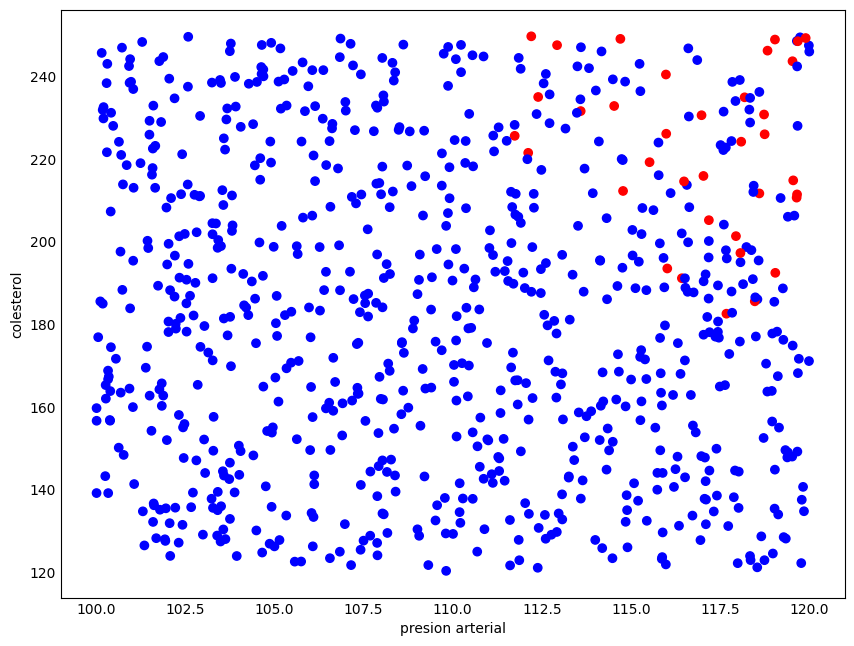

In [205]:
#4) 

def  graficar(presion_arterial,valores_colesterol,instancias_con_clases_determinadas):

    plt.figure(figsize=(8, 6))
    #puntos originales generados por nosotros
    plt.scatter(presion_arterial,valores_colesterol,c=['blue' if i==0 else 'red' for i in instancias_con_clases_determinadas])

    #etiquetas
    plt.xlabel("presion arterial")
    plt.ylabel("colesterol")


    plt.show()

if  __name__ == "__main__":
    graficar(presion_arterial,valores_colesterol,instancias_con_clases_determinadas)

# tiene coherencia que al mayor colesterol mayor presion arterial
    


    

5. Entrena un regresor logístico (e.g. con clase LogisticRegression) con esos datos.

Re: se ha creado el modelo clf el cual toma como entrenamiento los valores inputs (X) y prediccion_para_entrenar_modelo (Y) utilizando el metodo fit. los valores de netradas ha sido la matriz de los 3 campos generados (presion arterial, valores colesterol y edad) y como valor de salida "prediccion para entrenar modelo" que lo hemos calculado matematicamente con el calculo de las probabilidades. hemos tenido que reducir los componentes con PCA ya que para que sea mas facil graficar.

In [206]:
#5
from sklearn.decomposition import PCA

if __name__=='__main__':

    #pca para reducir dimensionalidad
    pca = PCA(n_components=2)
    
    #para entrenar tenemos tres campos y las clases por tanto
    inputs=np.column_stack((presion_arterial,valores_colesterol,edad))
    inputs_2d = pca.fit_transform(inputs)
    prediccion_para_entrenar_modelo= instancias_con_clases_determinadas

    #modelo
    clf= LogisticRegression(random_state=0).fit(inputs_2d,prediccion_para_entrenar_modelo)

    #predicciones
    predicciones_de_salida_modelo=clf.predict(inputs_2d[:,:])
    print(predicciones_de_salida_modelo)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

6. Vuelve a dibujar la gráfica de los datos, dibujando también la curva de la regresión que separa
las clases.

Re: para graficar la data esta hemos creado una funcion tenido que reducir la dimensianalidad a dos dimensiones (paso anterior) y poder utulizar la herramienta de DecisionBoundaryDisplay para poder graficar las clases por separado. al reducir la dimensianadlidad las escales en x y Y han alterado sus valores, lo importante es ver como sus clases se distribuyen segun nuestro modelo.

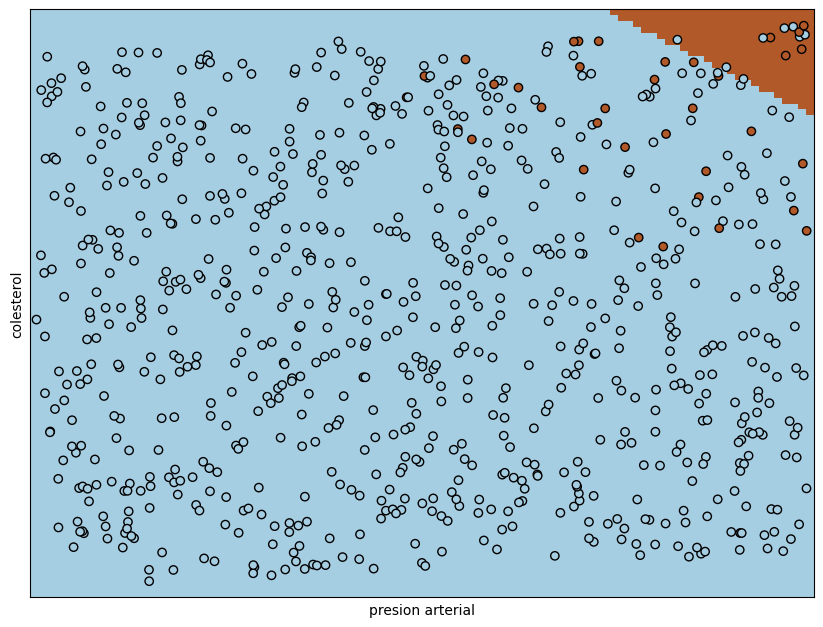

In [207]:
#6
from sklearn.inspection import DecisionBoundaryDisplay

#funcion para graficar predicciones y recta de regresion logistica
def graficar_predicciones_y_linea_regresion_logistica(inputs_2d,prediccion_para_entrenar_modelo):

    #para colocar mas grande
    _, ax = plt.subplots(figsize=(8, 6))

    #region de fronteras
    DecisionBoundaryDisplay.from_estimator(
    clf,
    inputs_2d,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
    )

    # Plot also the training points
    plt.scatter(inputs_2d[:, 0], inputs_2d[:, 1], c=prediccion_para_entrenar_modelo, edgecolors="k", cmap=plt.cm.Paired)

    #omitir escalas
    plt.xticks(())
    plt.yticks(())

    #etiquetas
    plt.xlabel("presion arterial")
    plt.ylabel("colesterol")

    plt.show()
    
    



if __name__=='__main__':
    graficar_predicciones_y_linea_regresion_logistica(inputs_2d,prediccion_para_entrenar_modelo);

    

    

7. Genera regresión logística para otro conjunto de personas (500) instancias y dibuja la misma
gráfica que en el punto 6. 

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

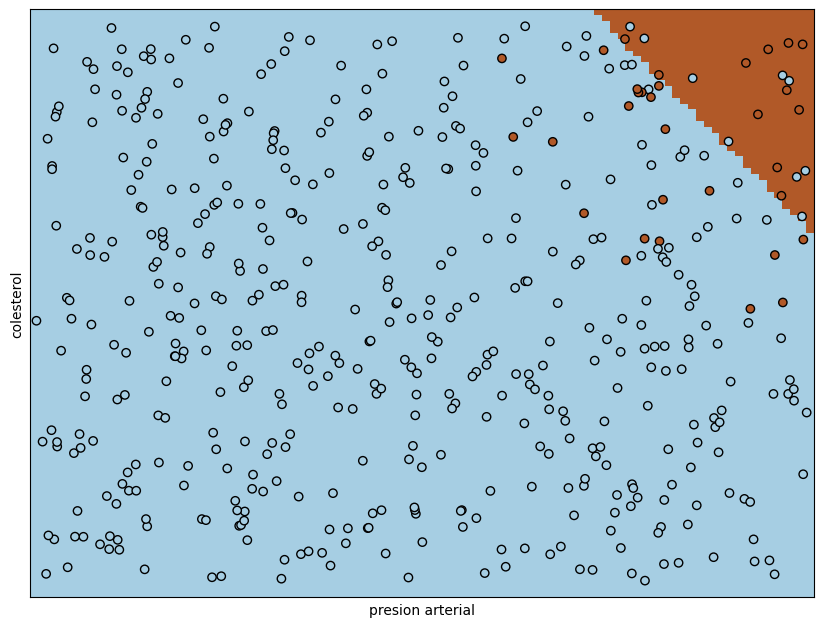

In [211]:
# 7) generar regresion para 500 nuevas instancias

if __name__=='__main__':   #generamos los datos de 500 instacias nuevas
    presion_arterial_nuevos,valores_colesterol_nuevos,edad_nuevos=generar_datos(500)

    #calculamos las probabilidades para las 500 instancias nuevas
    probabilidades_instancia_de_tener_problemas_nuevos= calculo_probabilidades(presion_arterial_nuevos,valores_colesterol_nuevos,edad_nuevos)

    #definido el umbral anteriormente aplicamos 0 y 1 en para las nuevas probabilidades
    instancias_con_clases_determinadas_nuevas= np.vectorize(umbral)(probabilidades_instancia_de_tener_problemas_nuevos)



    
    #objeto PCA
    pca = PCA(n_components=2)
    
    #para entrenar el modelo nuevo utilizamos los nuevos datos generados
    inputs_nuevos=np.column_stack((presion_arterial_nuevos,valores_colesterol_nuevos,edad_nuevos))
    inputs_2d_nuevos = pca.fit_transform(inputs_nuevos) # reduciondo la dimensionalidad
    prediccion_para_entrenar_modelo_nuevo= instancias_con_clases_determinadas_nuevas


    #modelo
    clf= LogisticRegression(random_state=0).fit(inputs_2d_nuevos,prediccion_para_entrenar_modelo_nuevo)

    #predicciones
    predicciones_de_salida_modelo_nuevos=clf.predict(inputs_2d_nuevos[:,:])
    print(predicciones_de_salida_modelo_nuevos)
    
    

    #graficamos los resultados
    graficar_predicciones_y_linea_regresion_logistica(inputs_2d_nuevos,prediccion_para_entrenar_modelo_nuevo);



Generando el grafico con una instancia de 500 no se observan mucha diferencias podria ya que el tamaño de las muestras no es una diferencia notable tiene un comportameinto simialar, las muestras catalogadas como clase de riesgo tienden a convergen a la zona naranja, en el caso mayor presion arterial mayor colesterol. La zona naranja si que se ha visto un poco afectado en su forma. en ambos ocasiones el factor de la edad esta influyendo en las muestras ya que no todas los puntos en la zona naranjas estan categorizadas como riesgo, en ambas graficas pasa igual. Se ha tenido que generar datos en distintas ocasiones ya que por el calculo de probabilidad pueden darse valores no deseados y para que estos tengan coherencia se generaron en par de ocasiones, por tanto al ejecutar pueden darse comportamientos extraños.

source: https://github.com/angelldavidd/IAIC/tree/main/Practica_2_regresion_logistica